## **Import Statments**

In [65]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# **Loading and inspecting data**

Reading the data

In [66]:
data = pd.read_csv("../input/ilnesses.csv")

Displaying the head of the data

In [67]:
data.head(10)

,target,text
0,Abdominal aortic aneurysm,About abdominal aortic aneurysms An abdomin...
1,Acne,About acne Acne is a common skin condition ...
2,Acute lymphoblastic leukaemia,About acute lymphoblastic leukaemia Leukaem...
3,Acute lymphoblastic leukaemia: Teenage...,Introduction This section is for teenagers ...
4,Acute myeloid leukaemia,About acute myeloid leukaemia Leukaemia is ...
5,Acute myeloid leukaemia: Teenagers and...,Introduction This section is for teenagers ...
6,Acute pancreatitis,About acute pancreatitis Acute pancreatitis...
7,Addison's disease,About Addisons disease Addisons disease (...
8,Alcohol misuse,About alcohol misuse Alcohol misuse means d...
9,Alcohol-related liver disease,About alcohol-related liver disease Alcohol...


Shape of the data

In [68]:
data.shape

(234, 2)

adding the test symptoms:

In [69]:
symptom1 = {'target' : 'xxxxx', 'text' : 'a pulsating feeling in your stomach (abdomen), usually near your belly button, that\'s usually only noticeable when you touch it persistent back pain persistent abdominal pain'}
symptom2 = {'target' : 'yyyyy', 'text' : 'a high temperature (fever) a headache nausea or vomiting muscle pain, including backache loss of appetite'}
symptom3 = {'target' : 'zzzzz', 'text' : 'a high temperature (fever) vomiting tiredness and lack of energy (lethargy) irritability poor feeding not gaining weight properly in very young children, yellowing of the skin and whites of the eyes (jaundice)'}

data.append(pd.Series(symptom1), ignore_index=True)
data.append(pd.Series(symptom2), ignore_index=True)
data.append(pd.Series(symptom3), ignore_index=True)

,target,text
0,Abdominal aortic aneurysm,About abdominal aortic aneurysms An abdomin...
1,Acne,About acne Acne is a common skin condition ...
2,Acute lymphoblastic leukaemia,About acute lymphoblastic leukaemia Leukaem...
3,Acute lymphoblastic leukaemia: Teenage...,Introduction This section is for teenagers ...
4,Acute myeloid leukaemia,About acute myeloid leukaemia Leukaemia is ...
5,Acute myeloid leukaemia: Teenagers and...,Introduction This section is for teenagers ...
6,Acute pancreatitis,About acute pancreatitis Acute pancreatitis...
7,Addison's disease,About Addisons disease Addisons disease (...
8,Alcohol misuse,About alcohol misuse Alcohol misuse means d...
9,Alcohol-related liver disease,About alcohol-related liver disease Alcohol...


# **Feature Engineering**

## **Removing punctions**

**Funtion to remove punctuation**

In [70]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

**Apply the function to each examples**

In [71]:
data['text'] = data['text'].apply(remove_punctuation)
data.head(10)

,target,text
0,Abdominal aortic aneurysm,About abdominal aortic aneurysms An abdomin...
1,Acne,About acne Acne is a common skin condition ...
2,Acute lymphoblastic leukaemia,About acute lymphoblastic leukaemia Leukaem...
3,Acute lymphoblastic leukaemia: Teenage...,Introduction This section is for teenagers ...
4,Acute myeloid leukaemia,About acute myeloid leukaemia Leukaemia is ...
5,Acute myeloid leukaemia: Teenagers and...,Introduction This section is for teenagers ...
6,Acute pancreatitis,About acute pancreatitis Acute pancreatitis...
7,Addison's disease,About Addisons disease Addisons disease a...
8,Alcohol misuse,About alcohol misuse Alcohol misuse means d...
9,Alcohol-related liver disease,About alcoholrelated liver disease Alcoholr...


## **Removing stopwords**

**Extract the stop words**

In [72]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [73]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


**Function to remove stopwords**

In [74]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

**Apply the function to each examples**

In [75]:
data['text'] = data['text'].apply(stopwords)
data.head(10)

,target,text
0,Abdominal aortic aneurysm,abdominal aortic aneurysms abdominal aortic an...
1,Acne,acne acne common skin condition affects people...
2,Acute lymphoblastic leukaemia,acute lymphoblastic leukaemia leukaemia cancer...
3,Acute lymphoblastic leukaemia: Teenage...,introduction section teenagers young adults ty...
4,Acute myeloid leukaemia,acute myeloid leukaemia leukaemia cancer white...
5,Acute myeloid leukaemia: Teenagers and...,introduction section teenagers young adults ty...
6,Acute pancreatitis,acute pancreatitis acute pancreatitis serious ...
7,Addison's disease,addisons disease addisons disease also known...
8,Alcohol misuse,alcohol misuse alcohol misuse means drinking e...
9,Alcohol-related liver disease,alcoholrelated liver disease alcoholrelated li...


## **Top words before stemming**

**Collect vocabulary count**

We will not use word counts as feature for NLP since tf-idf is a better metric

In [76]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()  

Store the vocab and counts in a pandas dataframe

In [77]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

**Bar plot of top words before stemming**

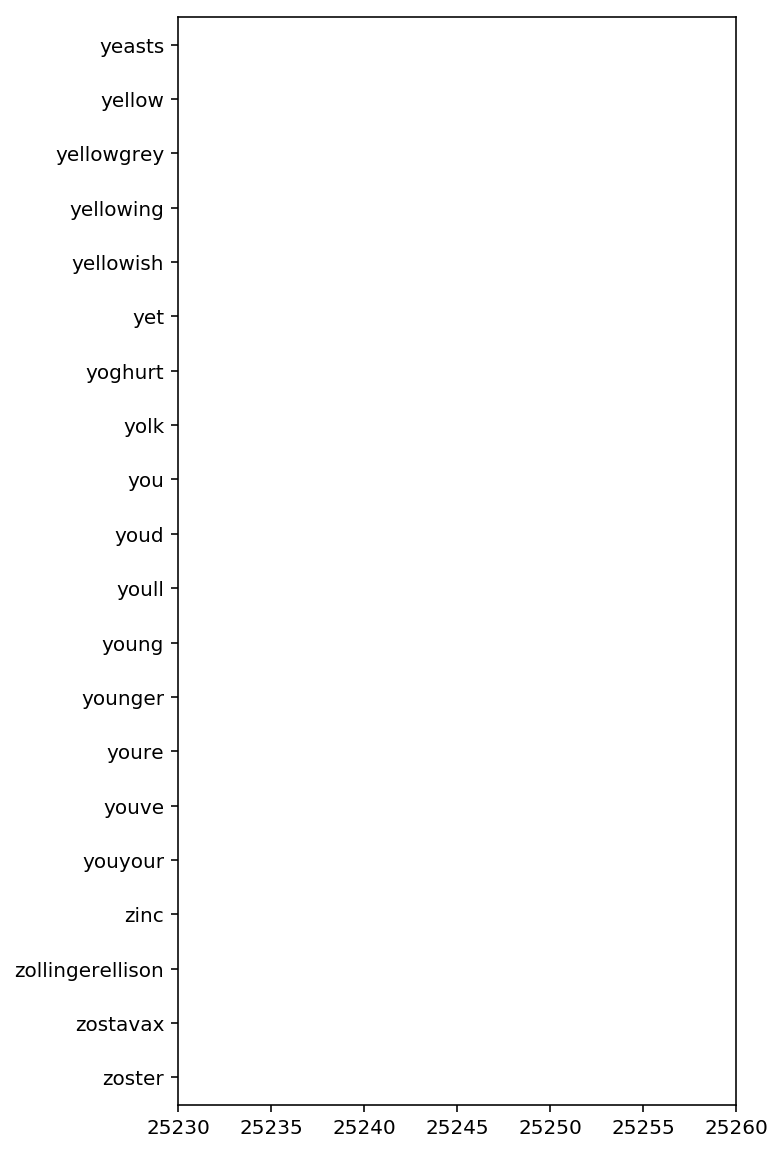

In [78]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

##  **Stemming operations**

Stemming operation bundles together words of same root. E.g. stem operation bundles "response" and "respond" into a common "respon" 

**A funtion to carry out stemming operation**

In [79]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

**Apply the function to each examples**

In [80]:
data['text'] = data['text'].apply(stemming)
data.head(10)

,target,text
0,Abdominal aortic aneurysm,abdomin aortic aneurysm abdomin aortic aneurys...
1,Acne,acn acn common skin condit affect peopl point ...
2,Acute lymphoblastic leukaemia,acut lymphoblast leukaemia leukaemia cancer wh...
3,Acute lymphoblastic leukaemia: Teenage...,introduct section teenag young adult type canc...
4,Acute myeloid leukaemia,acut myeloid leukaemia leukaemia cancer white ...
5,Acute myeloid leukaemia: Teenagers and...,introduct section teenag young adult type canc...
6,Acute pancreatitis,acut pancreat acut pancreat serious condit pan...
7,Addison's disease,addison diseas addison diseas also known pri...
8,Alcohol misuse,alcohol misus alcohol misus mean drink excess ...
9,Alcohol-related liver disease,alcoholrel liver diseas alcoholrel liver disea...


## **Top words after stemming operation**

**Collect vocabulary count**

In [81]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

**Bar plot of top words after stemming**

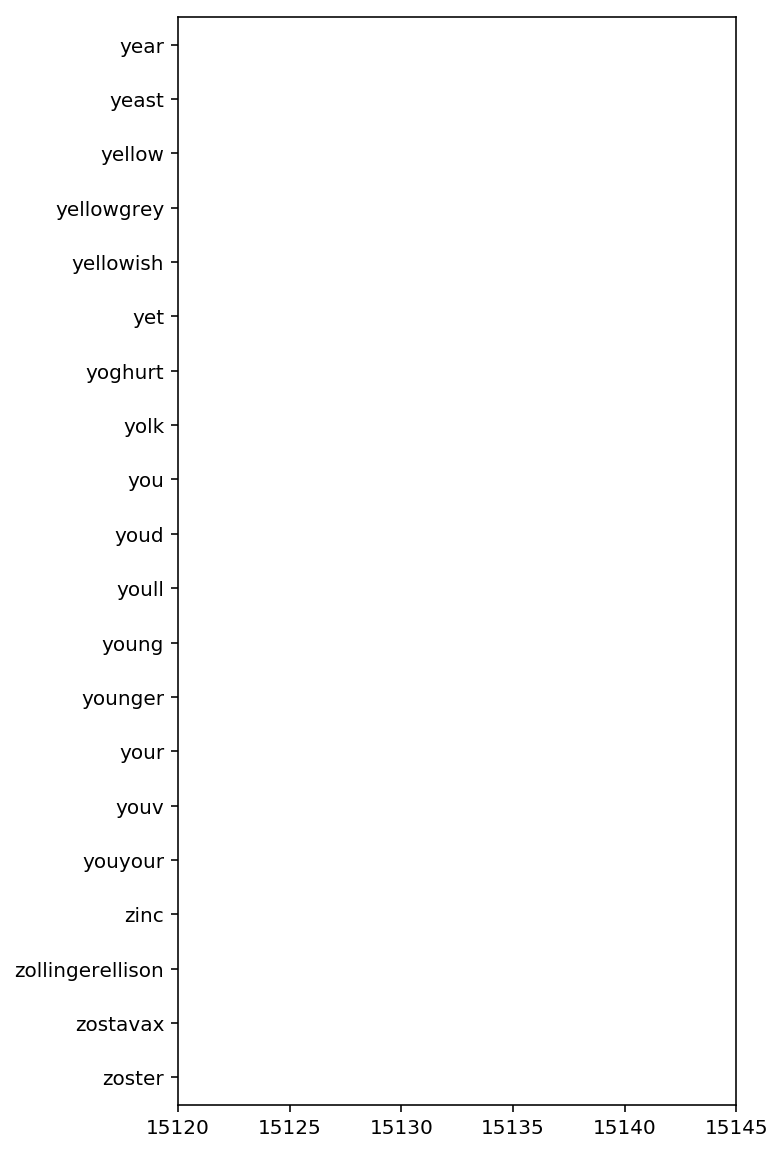

In [82]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

## **Histogram of text length of each writer**

A function to return the length of text

In [83]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

Apply the function to each example

In [84]:
data['length'] = data['text'].apply(length)
data.head(10)

,target,text,length
0,Abdominal aortic aneurysm,abdomin aortic aneurysm abdomin aortic aneurys...,12779
1,Acne,acn acn common skin condit affect peopl point ...,14069
2,Acute lymphoblastic leukaemia,acut lymphoblast leukaemia leukaemia cancer wh...,14957
3,Acute lymphoblastic leukaemia: Teenage...,introduct section teenag young adult type canc...,5239
4,Acute myeloid leukaemia,acut myeloid leukaemia leukaemia cancer white ...,16337
5,Acute myeloid leukaemia: Teenagers and...,introduct section teenag young adult type canc...,5659
6,Acute pancreatitis,acut pancreat acut pancreat serious condit pan...,12844
7,Addison's disease,addison diseas addison diseas also known pri...,9199
8,Alcohol misuse,alcohol misus alcohol misus mean drink excess ...,11465
9,Alcohol-related liver disease,alcoholrel liver diseas alcoholrel liver disea...,19067


# **TF-IDF Extraction**

tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [85]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [86]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4619,4620,4621,4622,4623,4624,4625,4626,4627,4628
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.011132,0.000000,0.014,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.115675,0.000,0.027173,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.015659,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.059684,0.000,0.021030,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.021451,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.032238,0.0,0.029971,0.0,0.0,0.0,0.0,...,0.014588,0.000000,0.000,0.038935,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.013344,0.000000,0.000,0.008904,0.027364,0.0,0.0,0.0,0.0,0.0


# **Training Model**

We are going to train Naive Bayes Classifier. Naive Bayes Classifier is a good choice given we have a medium sized dataset, NB classifier scales well and also NB classifier has been historically used in NLP tasks. We will train Multinomial and Bernoulli NB classifier, since they almost always outperfrom Gaussian NB classifier in NLP tasks

Adding the output to the dataframe

In [87]:
df['output'] = data['target']
df['id'] = data['text']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4621,4622,4623,4624,4625,4626,4627,4628,output,id
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Abdominal aortic aneurysm,abdomin aortic aneurysm abdomin aortic aneurys...
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.014,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Acne,acn acn common skin condit affect peopl point ...
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Acute lymphoblastic leukaemia,acut lymphoblast leukaemia leukaemia cancer wh...
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.027173,0.000000,0.0,0.0,0.0,0.0,0.0,Acute lymphoblastic leukaemia: Teenage...,introduct section teenag young adult type canc...
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Acute myeloid leukaemia,acut myeloid leukaemia leukaemia cancer white ...
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.021030,0.000000,0.0,0.0,0.0,0.0,0.0,Acute myeloid leukaemia: Teenagers and...,introduct section teenag young adult type canc...
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Acute pancreatitis,acut pancreat acut pancreat serious condit pan...
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,Addison's disease,addison diseas addison diseas also known pri...
8,0.0,0.0,0.0,0.032238,0.0,0.029971,0.0,0.0,0.0,0.0,...,0.000,0.038935,0.000000,0.0,0.0,0.0,0.0,0.0,Alcohol misuse,alcohol misus alcohol misus mean drink excess ...
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000,0.008904,0.027364,0.0,0.0,0.0,0.0,0.0,Alcohol-related liver disease,alcoholrel liver diseas alcoholrel liver disea...


Features and output of the models

In [88]:
features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)
features.remove('id')

**Import neccassary sklearn modules**

In [89]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

##  **Tuning Multinomial Naive Bayes Classifier**

List of alpha parameter we are going to try

In [90]:
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

**Gridsearch**

In [91]:
# parameter grid
parameter_grid = [{"alpha":alpha_list1}]

In [92]:
# classifier object
classifier1 = MultinomialNB()

classifier1.fit(df[features].iloc[:-3,:], df[output].iloc[:-3])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
classifier1.predict(df[features].tail(3))

array(['        Dehydration', '        Postnatal depression',
       '        Dehydration'], dtype='<U65')